In [1]:
import pandas as pd
import numpy as np
from myProjectAquire import get_telco_data
from myProjectPrepare import prep_telco, split_telco
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Important Key
#Internet Service Type ID:
# 1 - DSL
# 2 - Fiber Optic
# 3 - None




df = get_telco_data()
newdf = prep_telco(df)
newdf = newdf.drop(columns = 'Unnamed: 0')
train, validate, test = split_telco(newdf)


In [3]:
newdf[newdf.isna().any(axis=1)]

,internet_service_type_id,contract_type_id,senior_citizen,tenure,payment_type_id,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_service,uses_paperless_billing,did_churn,has_mult_lines,has_online_security,has_online_backup,has_device_protection,has_tech_support,can_stream_tv,can_stream_movie


In [4]:
x_train = train.drop(columns = 'did_churn')
y_train = train.did_churn
x_validate = validate.drop(columns = 'did_churn')
y_validate = validate.did_churn
x_test = test.drop(columns = 'did_churn')
y_test = test.did_churn

In [5]:
baseline = (y_train == 0).mean()

In [6]:
print('our baseline accuracy for not churning is:', baseline)

our baseline accuracy for not churning is: 0.7346745562130178


nciwucndsjlac

In [7]:
x_test

,internet_service_type_id,contract_type_id,senior_citizen,tenure,payment_type_id,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_service,uses_paperless_billing,has_mult_lines,has_online_security,has_online_backup,has_device_protection,has_tech_support,can_stream_tv,can_stream_movie
3160,2,2,0,51,2,0.801263,0.575724,1,1,1,1,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1577,1,3,0,65,3,0.597895,0.505043,1,1,0,1,0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
6823,2,1,0,18,1,0.808842,0.200431,1,0,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3615,2,1,0,25,1,0.888421,0.309282,0,0,0,1,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0
882,2,1,1,4,1,0.748211,0.042885,1,0,0,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1,1,0,2,1,0.643368,0.018515,1,0,0,1,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6441,1,1,0,1,2,0.384842,0.005262,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5985,3,3,0,67,3,0.215579,0.206148,1,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2452,1,3,0,72,4,0.324211,0.318142,0,1,1,0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [8]:
#                                    FINDING BEST DECISION TREE

In [9]:
#                                        USING TRAIN DATA

In [10]:
# Here I am creating Decision tree models depths of every second number between one and twenty and than finding 
#                  their score in order to see which will be the best to use.
for i in range (1 , 20, 1):
    DTC = DecisionTreeClassifier(max_depth = i)
    DTC.fit(x_train,y_train)
    y_preds = pd.DataFrame({
     'y_act': y_train,
     'baseline': 0,
     'model_x' : DTC.predict(x_train)})
    print(i,DTC.score(x_train,y_train), '\n')
    

1 0.7346745562130178 

2 0.7498224852071006 

3 0.7843786982248521 

4 0.7924260355029585 

5 0.7992899408284023 

6 0.8125443786982248 

7 0.8260355029585799 

8 0.84 

9 0.8629585798816568 

10 0.8811834319526627 

11 0.8979881656804733 

12 0.9226035502958579 

13 0.9410650887573965 

14 0.9576331360946746 

15 0.9718343195266272 

16 0.9824852071005917 

17 0.9912426035502958 

18 0.9957396449704142 

19 0.9978698224852071 



In [11]:
#                                       Using Validate Data
for i in range (1 , 20, 1):
    DTC = DecisionTreeClassifier(max_depth = i)
    DTC.fit(x_train,y_train)
    y_preds = pd.DataFrame({
     'y_act': y_validate,
     'baseline': 0,
     'model_x' : DTC.predict(x_validate)})
    print(i,DTC.score(x_validate,y_validate), '\n')

1 0.7345635202271115 

2 0.7579843860894251 

3 0.7877927608232789 

4 0.7977288857345636 

5 0.7877927608232789 

6 0.7913413768630234 

7 0.7856635911994322 

8 0.7799858055358411 

9 0.7750177430801988 

10 0.759403832505323 

11 0.7537260468417317 

12 0.7530163236337828 

13 0.7508871540099361 

14 0.7501774308019872 

15 0.7473385379701917 

16 0.7366926898509581 

17 0.7402413058907026 

18 0.7374024130589071 

19 0.7374024130589071 



In [12]:
#                                          Using Test Data
for i in range (1 , 11, 1):
    DTC = DecisionTreeClassifier(max_depth = i)
    DTC.fit(x_train,y_train)
    y_preds = pd.DataFrame({
     'y_act': y_test,
     'baseline': 0,
     'model_x' : DTC.predict(x_test)})
    print(i,DTC.score(x_test,y_test), '\n')

1 0.7345635202271115 

2 0.751596877217885 

3 0.7927608232789212 

4 0.7842441447835344 

5 0.7842441447835344 

6 0.7849538679914834 

7 0.7842441447835344 

8 0.7750177430801988 

9 0.7650816181689141 

10 0.7622427253371186 



In [13]:
# Random Forest Models

In [46]:
metrics = []
l = 20
for i in range(2, 21,2):
    rf = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    train_acc = rf.score(x_train, y_train)
    
    val_acc = rf.score(x_validate, y_validate)

    output = {
        'min_leaf': l,
        "max_depth": i,
        "train_accuracy": train_acc,
        "validate_accuracy": val_acc
    }
    
    metrics.append(output)
    l = l - 2
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,20,2,0.750059,0.748758,0.001301
1,18,4,0.794320,0.799858,-0.005539
2,16,6,0.817988,0.802697,0.015291
3,14,8,0.849231,0.808375,0.040856
4,12,10,0.896331,0.803407,0.092925
5,10,12,0.957396,0.799148,0.158248
6,8,14,0.989349,0.794180,0.195169
7,6,16,0.996923,0.792051,0.204872
8,4,18,0.998107,0.794180,0.203926
9,2,20,0.998107,0.784954,0.213153


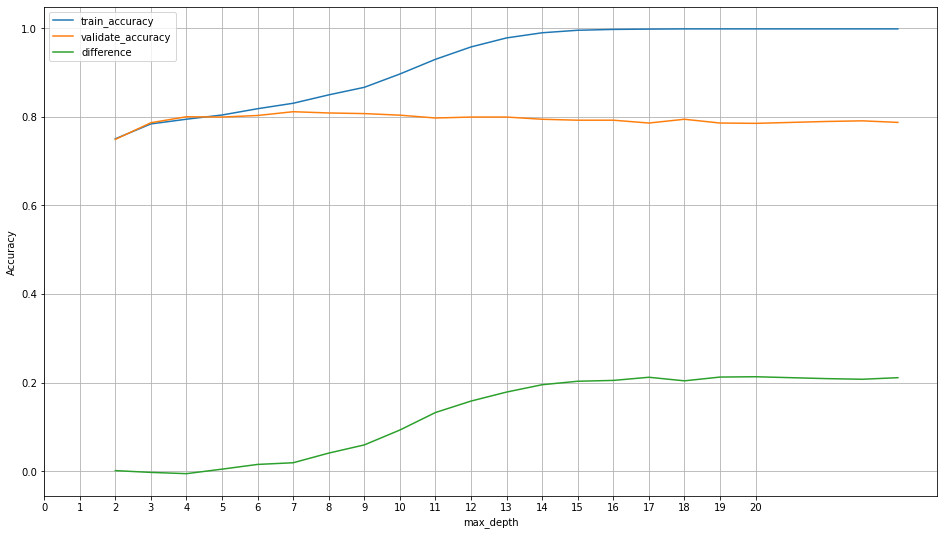

In [15]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [16]:
#                                           Train models:
#   Here I am making a few random forest models with sample increasing from 2 and depth decreasing from 20 on 
#                                      my train data.

l = 20
for i in range(2,21,2):
    
    rf = RandomForestClassifier(min_samples_leaf = l ,max_depth = i , random_state = 123)
    rf.fit(x_train,y_train)
    y_pred3 = rf.predict(x_train)
    print('min sample = ', i, 'max depth =', l, rf.score(x_train, y_train))
    l = l - 2
    


min sample =  2 max depth = 20 0.7500591715976331
min sample =  4 max depth = 18 0.7950295857988166
min sample =  6 max depth = 16 0.8139644970414202
min sample =  8 max depth = 14 0.8236686390532545
min sample =  10 max depth = 12 0.8300591715976331
min sample =  12 max depth = 10 0.840473372781065
min sample =  14 max depth = 8 0.8459171597633136
min sample =  16 max depth = 6 0.8631952662721893
min sample =  18 max depth = 4 0.882603550295858
min sample =  20 max depth = 2 0.9431952662721893


In [17]:
#Here I am making a few more random forest models with sample and depth increasing by 2 up to 20.
l = 2
for i in range(2,21,2):
    
    rf = RandomForestClassifier(min_samples_leaf = l ,max_depth = i , random_state = 123)
    rf.fit(x_train,y_train)
    y_pred3 = rf.predict(x_train)
    print('min sample = ', i, 'max depth =', l, rf.score(x_train, y_train))
    l = l + 2
    

min sample =  2 max depth = 2 0.7500591715976331
min sample =  4 max depth = 4 0.7943195266272189
min sample =  6 max depth = 6 0.8146745562130178
min sample =  8 max depth = 8 0.8300591715976331
min sample =  10 max depth = 10 0.8331360946745562
min sample =  12 max depth = 12 0.8331360946745562
min sample =  14 max depth = 14 0.8276923076923077
min sample =  16 max depth = 16 0.8262721893491124
min sample =  18 max depth = 18 0.8222485207100592
min sample =  20 max depth = 20 0.8210650887573965


In [18]:
# From our train data it seems the best paramaters to use in our random forest would be a min sample of 20 
#and a max depth of 2 

In [19]:
#                                          Validate Models:
#        Here I am making a few random forest models with sample increasing from 2 and depth decreasing from 20 on 
#                                          my validate data.
l = 20
for i in range(2,21,2):
    
    rf = RandomForestClassifier(min_samples_leaf = l ,max_depth = i , random_state = 123)
    rf.fit(x_train,y_train)
    print('min sample = ', i, 'max depth =', l, rf.score(x_validate, y_validate))
    l = l - 2

min sample =  2 max depth = 20 0.7487579843860894
min sample =  4 max depth = 18 0.7963094393186657
min sample =  6 max depth = 16 0.8005677785663591
min sample =  8 max depth = 14 0.8026969481902059
min sample =  10 max depth = 12 0.7998580553584103
min sample =  12 max depth = 10 0.801277501774308
min sample =  14 max depth = 8 0.8069552874378992
min sample =  16 max depth = 6 0.8069552874378992
min sample =  18 max depth = 4 0.7963094393186657
min sample =  20 max depth = 2 0.794180269694819


In [20]:
#        Here I am making a few more random forest models with sample and depth increasing by 2 up to 20 on
#                                        my validate data.
l = 2
for i in range(2,21,2):
    
    rf = RandomForestClassifier(min_samples_leaf = i ,max_depth = l , random_state = 123)
    rf.fit(x_train,y_train)
    y_pred3 = rf.predict(x_train)
    print('min sample = ', i, 'max depth =', l, rf.score(x_validate, y_validate))
    l = l + 2

min sample =  2 max depth = 2 0.7487579843860894
min sample =  4 max depth = 4 0.7984386089425124
min sample =  6 max depth = 6 0.8034066713981547
min sample =  8 max depth = 8 0.801277501774308
min sample =  10 max depth = 10 0.801277501774308
min sample =  12 max depth = 12 0.8005677785663591
min sample =  14 max depth = 14 0.8005677785663591
min sample =  16 max depth = 16 0.7991483321504613
min sample =  18 max depth = 18 0.8005677785663591
min sample =  20 max depth = 20 0.8026969481902059


In [21]:
acc = DTC.score(x_train, y_train)
accuracy_score(y_preds.y_act, y_preds)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [22]:
pd.DataFrame(classification_report(y_preds.y_act, y_preds.model_1, output_dict=True))

AttributeError: 'DataFrame' object has no attribute 'model_1'

In [ ]:
conf = confusion_matrix(y_preds.y_act, y_preds.model_1)

In [ ]:
rubric_df = pd.DataFrame({
    'pred_no_churn': ['True Negative', 'False Negative'],
    'pred_churn':['False Positive','True Positive']
    }, index=['actual_no_churn', 'actual_churn'])

In [ ]:
rubric_df

In [ ]:
rubric_df + ': ' + conf.astype(str)

In [ ]:
#                             LOGREG
logreg = LogisticRegression()
logreg2 = LogisticRegression(C = .3)

In [23]:
for i in range(1,11,1):
    i = i * .1
    logreg = LogisticRegression(C = i , random_state = 123)
    logreg.fit(x_train,y_train)
    print(logreg.score(x_validate, y_validate))

0.801277501774308
0.8055358410220014
0.8090844570617459
0.8090844570617459
0.8097941802696949
0.8069552874378992
0.8076650106458482
0.8069552874378992
0.8062455642299503
0.8076650106458482


In [24]:
logreg.fit(x_train,y_train)
logreg2.fit(x_train,y_train)

NameError: name 'logreg2' is not defined

In [ ]:
y_pred = logreg.predict(x_train)
y_pred2 = logreg.predict(x_train)

In [25]:
logreg.classes_

array([0, 1])

In [26]:
y_pred_proba = logreg.predict_proba(x_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['did_not_churn', 'did_churn'])
y_pred_proba2 = logreg.predict_proba(x_train)
y_pred_proba2 = pd.DataFrame(y_pred_proba, columns = ['did_not_churn', 'did_churn'])

In [27]:
y_pred_proba

,did_not_churn,did_churn
0,0.818048,0.181952
1,0.968097,0.031903
2,0.556792,0.443208
3,0.979349,0.020651
4,0.874425,0.125575
...,...,...
4220,0.575638,0.424362
4221,0.805455,0.194545
4222,0.343541,0.656459
4223,0.961777,0.038223


In [28]:
print(classification_report(y_train, y_pred))

NameError: name 'y_pred' is not defined

In [36]:
#log_coeffs = pd.DataFrame(logreg.coef_[0], index=x_train.columns,
                         #columns=['coeff'])
#log_coeffs2 = pd.DataFrame(logreg2.coef_[0], index = x_train.columns, columns = ['coeff'])


abs_vals = log_coeffs['coeff'].abs() 
abs_vals.nlargest(14)

monthly_charges           3.495259
total_charges             1.480456
has_phone_service         1.098233
contract_type_id          0.650259
has_online_security       0.472524
uses_paperless_billing    0.422970
has_tech_support          0.390465
has_online_backup         0.340688
senior_citizen            0.226730
has_device_protection     0.154165
payment_type_id           0.148699
has_mult_lines            0.126007
has_dependents            0.106913
can_stream_movie          0.093708
Name: coeff, dtype: float64

In [38]:
odds = np.exp(log_coeffs)
#odds
log_coeffs.coeff.nlargest(10)

monthly_charges             3.495259
total_charges               1.480456
uses_paperless_billing      0.422970
senior_citizen              0.226730
has_mult_lines              0.126007
internet_service_type_id    0.070556
can_stream_tv              -0.011161
is_female                  -0.027493
tenure                     -0.046162
has_partner                -0.069243
Name: coeff, dtype: float64

In [31]:
log_coeffs2

NameError: name 'log_coeffs2' is not defined

In [39]:
imp_feats = ['monthly_charges','total_charges','has_phone_service','contract_type_id','has_online_security','uses_paperless_billing','has_tech_support','has_online_backup','senior_citizen','has_device_protection','has_mult_lines','has_dependents']
imp_feats2 = ['monthly_charges','total_charges','internet_service_type_id','senior_citizen','has_mult_lines','uses_paperless_billing']
logit1 = LogisticRegression(random_state=1100)

logit1.fit(x_train,y_train)

y_pred = logit1.predict(x_train)

print((logit1.score(x_train, y_train)))


0.797396449704142


In [40]:
logit2 = LogisticRegression(random_state=1100)
logit2.fit(x_train[imp_feats], y_train)
y_pred = logit2.predict(x_train[imp_feats])
print((logit2.score(x_train[imp_feats], y_train)))

0.796923076923077


In [41]:
logit3 = LogisticRegression(random_state=1100)
logit3.fit(x_train[imp_feats2], y_train)
y_pred = logit3.predict(x_train[imp_feats2])
print((logit3.score(x_train[imp_feats2], y_train)))

0.7853254437869822


In [42]:
#                                   Validate feature significance

logit4 = LogisticRegression(random_state=1100)
logit4.fit(x_train,y_train)
y_pred = logit4.predict(x_train)
print((logit4.score(x_validate,y_validate)))

0.8076650106458482


In [43]:
logit2 = LogisticRegression(random_state=1100)
logit2.fit(x_train[imp_feats], y_train)
y_pred = logit2.predict(x_train[imp_feats])
print((logit2.score(x_validate[imp_feats], y_validate)))

0.7991483321504613


In [44]:
logit3 = LogisticRegression(random_state=1100)
logit3.fit(x_train[imp_feats2], y_train)
y_pred = logit3.predict(x_train[imp_feats2])
print((logit3.score(x_validate[imp_feats2], y_validate)))

0.7849538679914834


In [ ]:
baseline_accuracy = round((train.did_churn == 0).mean(), 2)

In [ ]:
baseline_accuracy

In [ ]:
melted = newdf.melt(id_vars=['did_churn'])
melted

In [ ]:
for col in df.columns:
        if df[col].dtype != 'object':
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.show()

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(newdf)

In [ ]:
newdf[['monthly_charges', 'total_charges']] = scaler.fit_transform(newdf[['monthly_charges', 'total_charges']])

In [ ]:
newdf

In [ ]:
    newdf[newdf['total_charges'].str.len() == 0] = 0
    #newdf['total_charges'] = newdf['total_charges'].astype(float)
    #newdf.total_charges = newdf.total_charges.str.strip()

In [ ]:
newdnewdf['total_charges']


In [ ]:
newdf.total_charges.value_counts()

In [ ]:
newdf

In [ ]:
print(classification_report(y_validate, logreg.predict(x_validate)))

In [ ]:
print(classification_report(y_validate, logreg2.predict(x_validate)))